# Evaluating a Machine learning model(score)

### Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator `score` method.
2. The `scoring` parameter.
3. Problem-specific metric functions

## 4.1 Evaluating a model with the `score` model

In [1]:
# Standard imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
heart_disease = pd.read_csv('~/sample_project/Data/heart-disease.csv')

In [3]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)



RandomForestClassifier()

In [5]:
clf.score(X_train, y_train)

1.0

In [6]:
clf.score(X_test, y_test)

0.831275720164609

### The same but for regression...

In [7]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor


boston = load_boston()

boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])



np.random.seed(42)

# Create the data

X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Instatiate and fit model

model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions

y_preds = model.predict(X_test)
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [8]:
model.score(X_test, y_test)

0.8654448653350507

## 4.2 Evaluating the model using the `scoring` parameter

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train);

In [10]:
clf.score(X_test, y_test)

0.831275720164609

In [11]:
np.random.seed(42)
cross_val_score(clf, X, y)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [12]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.83870968, 0.9       , 0.9       ,
       0.83333333, 0.73333333, 0.83333333, 0.73333333, 0.83333333])

In [13]:
np.random.seed(42)

# Single training and test split score.
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# Compare the two.
clf_single_score, clf_cross_val_score

(0.831275720164609, 0.8248087431693989)

In [14]:
# Default scoring parameter of classifier = mean accuracy
clf.score();

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [ ]:
# Scoring parameter set to None
np.random.seed(42)
cross_val_score(clf, X, y, scoring=None)

### 4.2 Classification model evaluation metrics.

1. Accuracy.
2. Area under ROC curve. 
3. Confusion matrix
4. Classification report 


**Accuracy**

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']


clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)

In [17]:
np.mean(cross_val_score)

0.8248087431693989

In [20]:
print(f"Heart Disease Classifier Cross-Validated accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated accuracy: 82.48%


**Area under the Receiver Operating Characteristic curve (AUC/ROC)**

* Area under Curve (AUC)
* ROC curve 

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0

* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

In [27]:
from sklearn.metrics import roc_curve

# Fit the classifier

clf.fit(X_train, y_train)

# Make predictions with probabilities

y_probs = clf.predict_proba(X_test) 
y_probs[:10], len(y_probs)


(array([[0.29, 0.71],
        [0.3 , 0.7 ],
        [0.42, 0.58],
        [0.56, 0.44],
        [0.35, 0.65],
        [0.16, 0.84],
        [0.32, 0.68],
        [0.94, 0.06],
        [0.16, 0.84],
        [0.35, 0.65]]),
 243)

In [29]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.71, 0.7 , 0.58, 0.44, 0.65, 0.84, 0.68, 0.06, 0.84, 0.65])

In [30]:
# Calculate fpr, tpr, thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates

fpr

array([0.        , 0.        , 0.        , 0.        , 0.00884956,
       0.00884956, 0.00884956, 0.00884956, 0.00884956, 0.00884956,
       0.00884956, 0.00884956, 0.01769912, 0.01769912, 0.01769912,
       0.01769912, 0.01769912, 0.02654867, 0.03539823, 0.04424779,
       0.07079646, 0.07079646, 0.07079646, 0.07964602, 0.07964602,
       0.09734513, 0.09734513, 0.09734513, 0.11504425, 0.14159292,
       0.14159292, 0.15044248, 0.15044248, 0.15044248, 0.15929204,
       0.16814159, 0.17699115, 0.19469027, 0.24778761, 0.25663717,
       0.26548673, 0.26548673, 0.26548673, 0.30088496, 0.30088496,
       0.33628319, 0.34513274, 0.34513274, 0.38053097, 0.38053097,
       0.39823009, 0.42477876, 0.43362832, 0.44247788, 0.46902655,
       0.50442478, 0.53097345, 0.54867257, 0.56637168, 0.57522124,
       0.60176991, 0.61946903, 0.63716814, 0.6460177 , 0.65486726,
       0.67256637, 0.7079646 , 0.72566372, 0.76106195, 0.7699115 ,
       0.81415929, 0.84070796, 0.85840708, 0.90265487, 0.91150

**Create a function for plotting ROC curves**

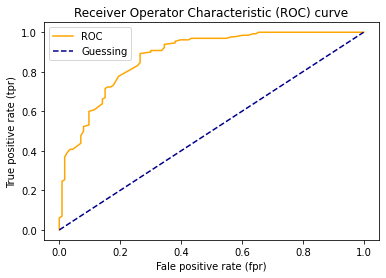

In [31]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate(fpr)
    and true positive rate(tpr) for a model.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    
    # Customise the plot
    
    plt.xlabel('Fale positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver Operator Characteristic (ROC) curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [32]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8784547311095984

**Plot perfect ROC curve and AUC score**

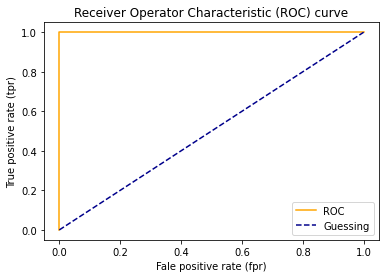

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_test)

plot_roc_curve(fpr, tpr)

In [34]:
roc_auc_score(y_test, y_test)

1.0